In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

In [57]:
# URL du 1er fichier CSV :
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'

# Lire le fichier CSV et créer  DataFrame :
df = pd.read_csv(url)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
# Charge le dataset Iris :
iris = load_iris()

# Converti en DataFrame pr 1 affichage + facile :
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Ajte la colonne 'species' (étiquettes de classe) :
df['species'] = iris.target_names[iris.target]

# Sélectionne les caractéristiq des 4 colonnes numériq :
X = df[iris.feature_names]

# Appliq KMeans pr trver 3 clusters :
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Affiche les résultats du clustering :
df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'cluster']].head()

C:\Users\sebla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


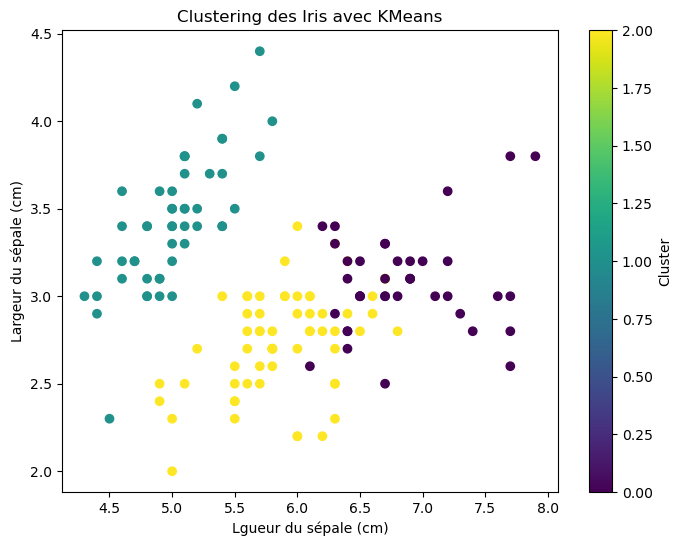

In [59]:
# Visualisat° des clusters (ici on utilise les lgueurs et largeurs de sépales)
plt.figure(figsize=(8, 6))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['cluster'], cmap='viridis')
plt.xlabel('Lgueur du sépale (cm)')
plt.ylabel('Largeur du sépale (cm)')
plt.title('Clustering des Iris avec KMeans')
plt.colorbar(label='Cluster')
plt.show()

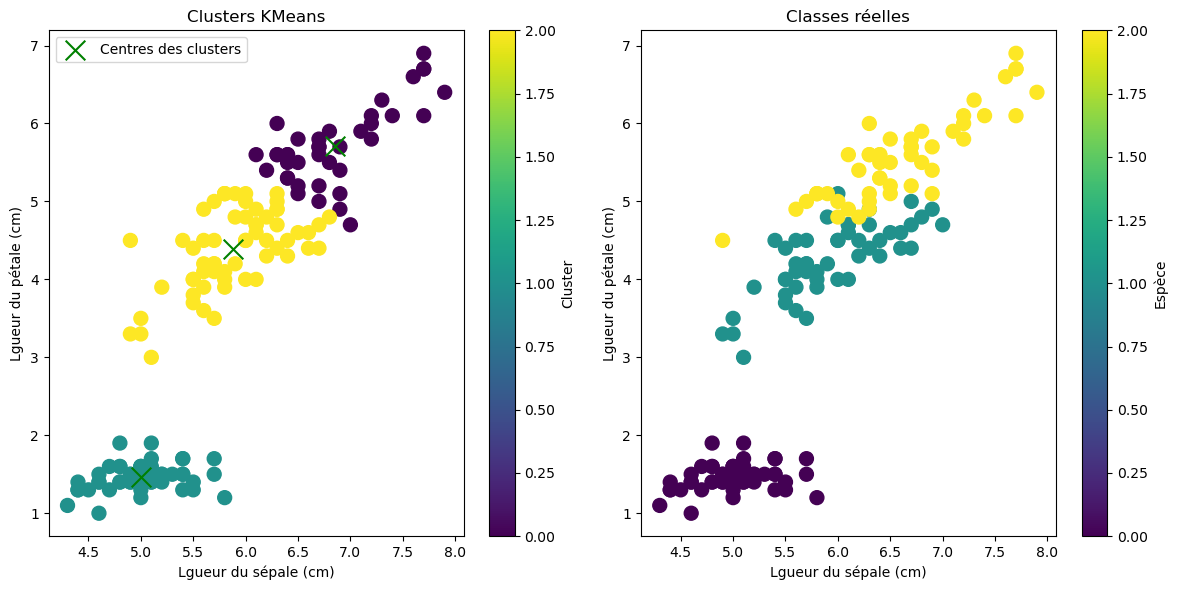

In [60]:
# Obtenir les centres des clusters
centers = kmeans.cluster_centers_

# Visualisat° avec les vraies classes ('species') et les clusters générés par KMeans :
plt.figure(figsize=(12, 6))

# Visualisat° des vraies classes :
plt.subplot(1, 2, 1)
scatter = plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df['cluster'], cmap='viridis', s=100)
plt.title('Clusters KMeans')
plt.xlabel('Lgueur du sépale (cm)')
plt.ylabel('Lgueur du pétale (cm)')
plt.colorbar(label='Cluster')

# Affiche les centres des clusters ss frme de croix vertes :
plt.scatter(centers[:, 0], centers[:, 2], c='green', marker='x', s=200, label='Centres des clusters')
plt.legend()

# Visualisat° des clusters générés par KMeans :
plt.subplot(1, 2, 2)
scatter = plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df['species'].apply(lambda x: iris.target_names.tolist().index(x)), cmap='viridis', s=100)
plt.title('Classes réelles')
plt.xlabel('Lgueur du sépale (cm)')
plt.ylabel('Lgueur du pétale (cm)')
plt.colorbar(label='Espèce')

plt.tight_layout()
plt.show()

C:\Users\sebla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


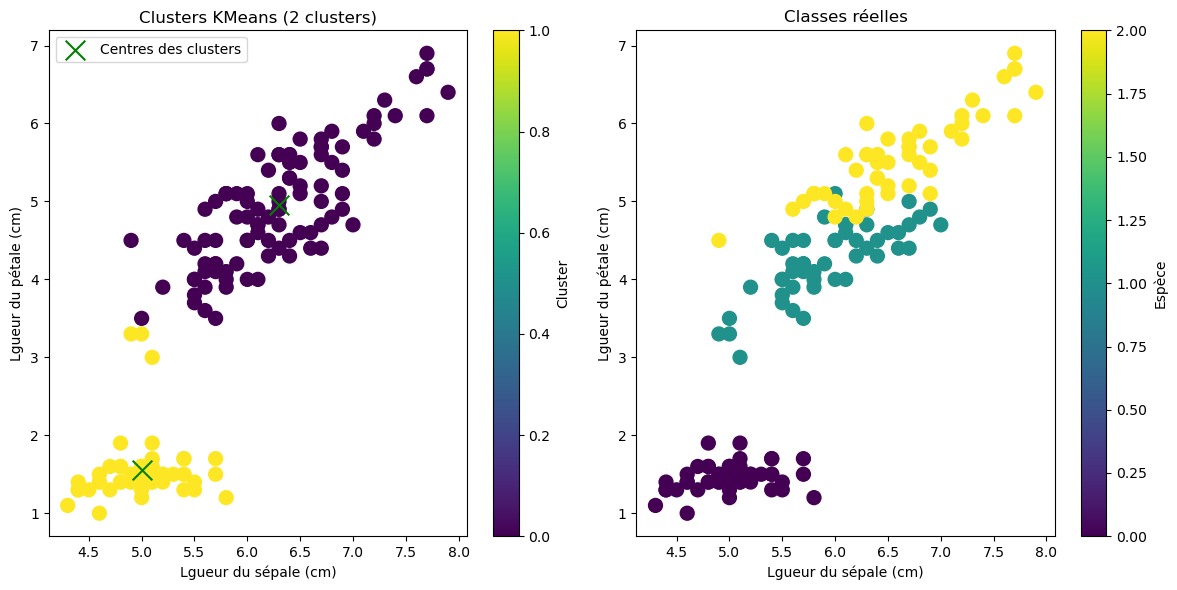

In [61]:
# Appliq KMeans pr trver 2 clusters (mdèle modifié) :
kmeans_2 = KMeans(n_clusters=2, random_state=42)
df['cluster_2'] = kmeans_2.fit_predict(X)

# Obtenir les centres des clusters pr KMeans à 2 clusters :
centers_2 = kmeans_2.cluster_centers_

# Visualisat° avec les vraies classes ('species') et les clusters générés par KMeans :
plt.figure(figsize=(12, 6))

# Visualisat° des clusters générés par KMeans avec 2 clusters :
plt.subplot(1, 2, 1)
scatter = plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df['cluster_2'], cmap='viridis', s=100)
plt.title('Clusters KMeans (2 clusters)')
plt.xlabel('Lgueur du sépale (cm)')
plt.ylabel('Lgueur du pétale (cm)')
plt.colorbar(label='Cluster')

# Affiche les centres des clusters ss frme de croix vertes :
plt.scatter(centers_2[:, 0], centers_2[:, 2], c='green', marker='x', s=200, label='Centres des clusters')
plt.legend()

# 2. Visualisat° des vraies classes ('species') :
plt.subplot(1, 2, 2)
scatter = plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df['species'].apply(lambda x: iris.target_names.tolist().index(x)), cmap='viridis', s=100)
plt.title('Classes réelles')
plt.xlabel('Lgueur du sépale (cm)')
plt.ylabel('Lgueur du pétale (cm)')
plt.colorbar(label='Espèce')

plt.tight_layout()
plt.show()

C:\Users\sebla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


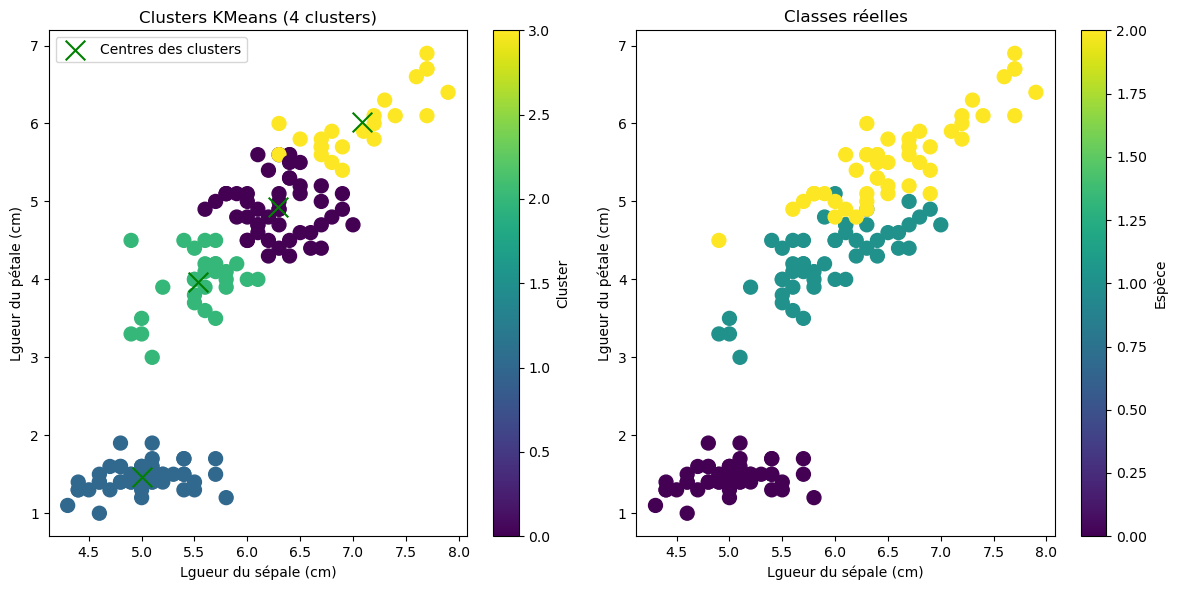

In [62]:
# Appliq KMeans pr trver 4 clusters (mdèle avec 4 clusters) :
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['cluster_4'] = kmeans_4.fit_predict(X)

# Obtenir les centres des clusters pr KMeans à 4 clusters :
centers_4 = kmeans_4.cluster_centers_

# Visualisat° avec les vraies classes ('species') et les clusters générés par KMeans :
plt.figure(figsize=(12, 6))

# Visualisat° des clusters générés par KMeans avec 4 clusters :
plt.subplot(1, 2, 1)
scatter = plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df['cluster_4'], cmap='viridis', s=100)
plt.title('Clusters KMeans (4 clusters)')
plt.xlabel('Lgueur du sépale (cm)')
plt.ylabel('Lgueur du pétale (cm)')
plt.colorbar(label='Cluster')

# Affiche les centres des clusters ss frme de croix vertes :
plt.scatter(centers_4[:, 0], centers_4[:, 2], c='green', marker='x', s=200, label='Centres des clusters')
plt.legend()

# Visualisat° des vraies classes ('species') :
plt.subplot(1, 2, 2)
scatter = plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df['species'].apply(lambda x: iris.target_names.tolist().index(x)), cmap='viridis', s=100)
plt.title('Classes réelles')
plt.xlabel('Lgueur du sépale (cm)')
plt.ylabel('Lgueur du pétale (cm)')
plt.colorbar(label='Espèce')

plt.tight_layout()
plt.show()

C:\Users\sebla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

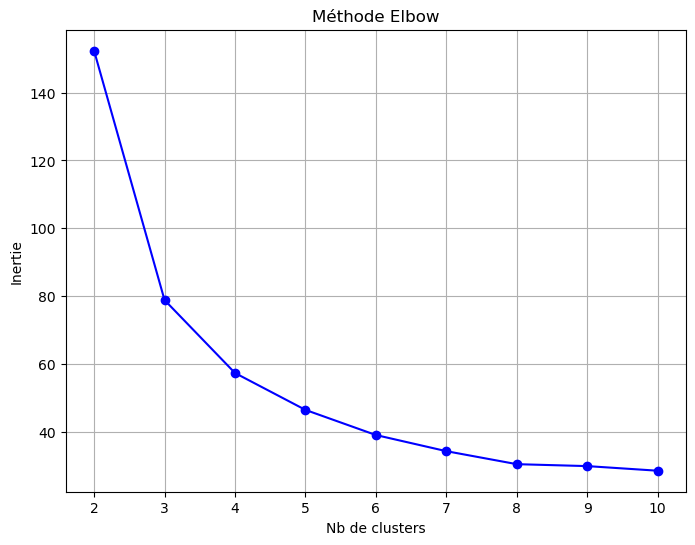

In [63]:
# Sélectionne les caractéristiq des 4 colonnes numériq :
X = df[iris.feature_names]

# Liste pr stocker l'inertie pr chaq nb de clusters :
inertia = []

# Appliq KMeans pr différents nb de clusters entre 2 et 10 :
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Trace l'inertie pr chaq nb de clusters :
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Méthode Elbow')
plt.xlabel('Nb de clusters')
plt.ylabel('Inertie')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

C:\Users\sebla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

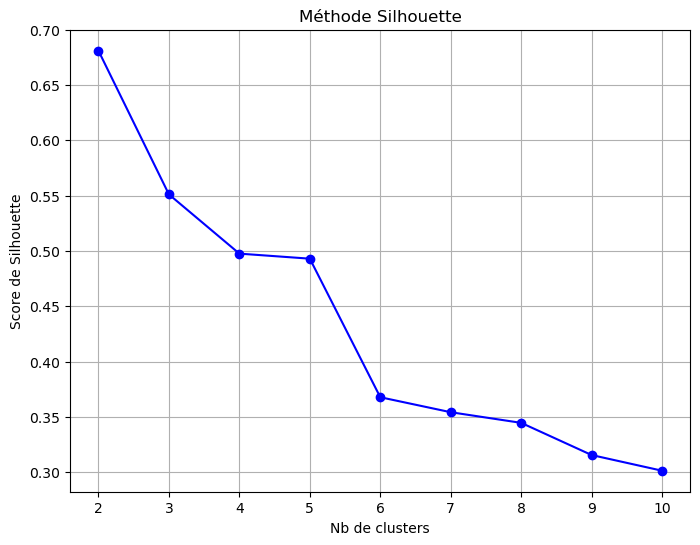

In [66]:
# Sélectionne les caractéristiq des 4 colonnes numériq :
X = df[iris.feature_names]

# Liste pr stocker les scores de silhouette pr chaq nb de clusters :
silhouette_scores = []

# Appliq KMeans pr différents nb de clusters entre 2 et 10 :
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Trace les scores de silhouette pr chaq nb de clusters :
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Méthode Silhouette')
plt.xlabel('Nb de clusters')
plt.ylabel('Score de Silhouette')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

Selon le graph, on pt voir q le nb optimal de clusters est 2 car on obtirnt le score le + élevé (0.68).